Dataset cargado → 2692 filas, 35 columnas
Variables finales: 501  |  Filas usadas: 2692


C:\Users\dmigl\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\dmigl\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\dmigl\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count



🎯 Accuracy: 0.853

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       519
           1       0.64      0.84      0.72       154

    accuracy                           0.85       673
   macro avg       0.79      0.85      0.81       673
weighted avg       0.88      0.85      0.86       673

Confusion Matrix:
[[445  74]
 [ 25 129]]

Top 15 features más relevantes:
amount_raised_usd           0.261249
goal_usd                    0.171374
is_ieo_unknown              0.043828
total_tokens                0.041162
token_price_usd             0.034249
hard_cap_usd                0.033952
jurisdiction_unknown        0.027021
token_type_6.0              0.020241
has_github_unknown          0.019119
role_of_token_unknown       0.018056
discount_max_pct            0.015593
accepts_unknown             0.015506
tokens_for_sale             0.015088
team_size                   0.014455
is_tax_regulated_unknown    0.012932


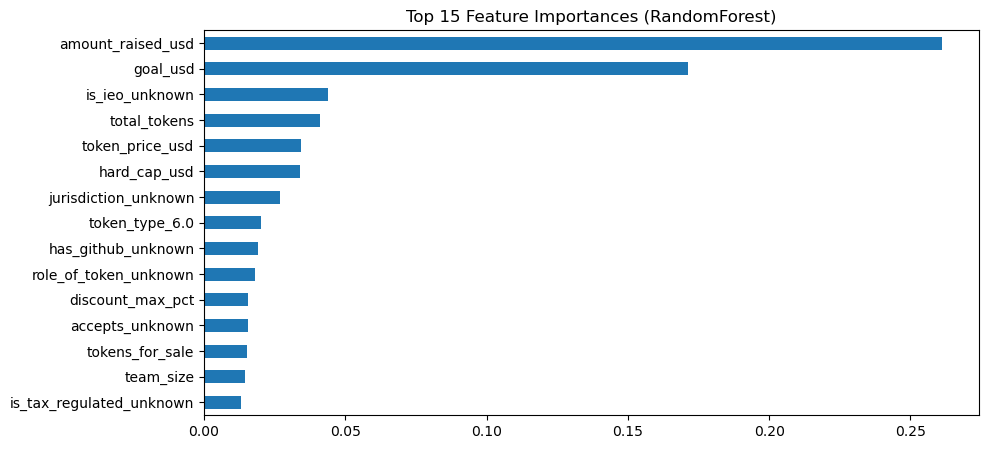

CPU times: total: 953 ms
Wall time: 1.91 s


In [2]:
%%time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ------------------ 1. CARGA ------------------
df = pd.read_csv("../datasets/final/ico_union_canonical_v3.csv")
print(f"Dataset cargado → {df.shape[0]} filas, {df.shape[1]} columnas")

# ------------------ 2. LIMPIEZA MÍNIMA ------------------
# Solo filas con etiqueta
df = df[df["ico_successful"].notna()].copy()

# Variables numéricas potencialmente útiles
num_cols = [
    "goal_usd","hard_cap_usd","amount_raised_usd",
    "token_price_usd","total_tokens","tokens_for_sale",
    "team_size","rating","discount_max_pct"
]
# Variables categóricas y binarias
cat_cols = [
    "token_type","role_of_token","jurisdiction","accepts",
    "kyc","whitelist","has_github","website_available",
    "whitepaper_available","is_ieo","is_tax_regulated"
]

# Filtrar solo las columnas existentes
num_cols = [c for c in num_cols if c in df.columns]
cat_cols = [c for c in cat_cols if c in df.columns]

# ------------------ 3. PREPROCESAMIENTO ------------------
# Reemplazar NaN numéricos por mediana
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")
    df[c] = df[c].fillna(df[c].median())

# Categóricas → string y luego get_dummies
for c in cat_cols:
    df[c] = df[c].astype(str).replace({"nan": "unknown"})

X = df[num_cols + cat_cols]
X = pd.get_dummies(X, drop_first=True)

y = df["ico_successful"].astype(int)

print(f"Variables finales: {X.shape[1]}  |  Filas usadas: {X.shape[0]}")

# ------------------ 4. SPLIT ------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# ------------------ 5. MODELO ------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

model = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    random_state=42,
    class_weight="balanced_subsample"
)
model.fit(X_train_scaled, y_train)

# ------------------ 6. EVALUACIÓN ------------------
y_pred = model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f"\n🎯 Accuracy: {acc:.3f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ------------------ 7. IMPORTANCIA DE FEATURES ------------------
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 15 features más relevantes:")
print(importances.head(15).to_string())

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
importances.head(15).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances (RandomForest)")
plt.show()


Dataset cargado → 2692 filas, 35 columnas
Variables finales: 506  |  Filas usadas: 2692


C:\Users\dmigl\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\dmigl\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\dmigl\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count



🎯 Accuracy: 0.969

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       519
           1       0.88      0.99      0.94       154

    accuracy                           0.97       673
   macro avg       0.94      0.98      0.96       673
weighted avg       0.97      0.97      0.97       673

Confusion Matrix:
[[499  20]
 [  1 153]]

Top 20 features más relevantes:
pct_goal_reached          0.249633
amount_raised_usd         0.161401
hardcap_ratio             0.112613
log_goal_usd              0.086206
goal_usd                  0.082162
avg_token_price_calc      0.024312
is_ieo_unknown            0.022095
total_tokens              0.018996
ico_duration_days         0.012851
hard_cap_usd              0.012689
has_github_unknown        0.012462
token_price_usd           0.011885
whitepaper_available_1    0.011528
jurisdiction_unknown      0.010701
discount_max_pct          0.010425
token_type_6.0            0.009

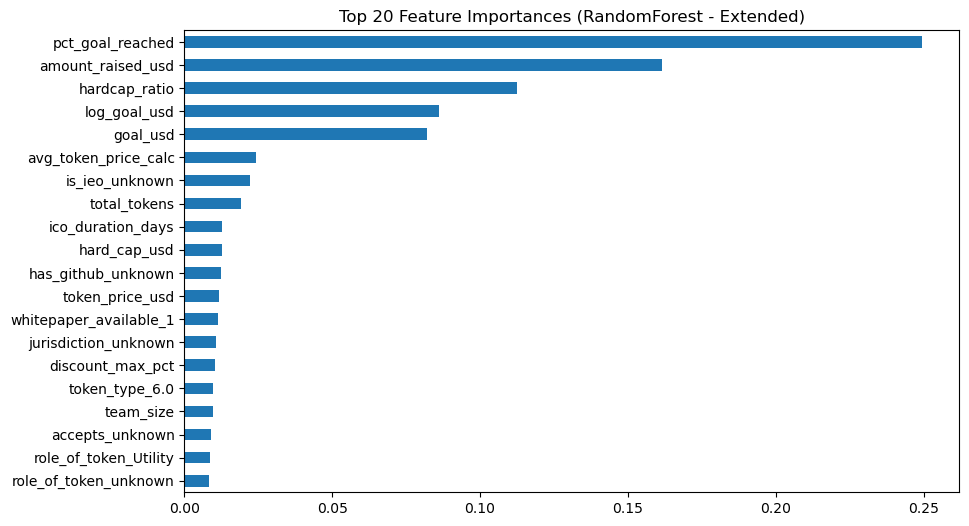

CPU times: total: 797 ms
Wall time: 809 ms


In [4]:
%%time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ------------------ 1. CARGA ------------------
df = pd.read_csv("../datasets/final/ico_union_canonical_v3.csv")
print(f"Dataset cargado → {df.shape[0]} filas, {df.shape[1]} columnas")

# ------------------ 2. LIMPIEZA MÍNIMA ------------------
df = df[df["ico_successful"].notna()].copy()

# ------------------ 3. FEATURES DERIVADAS ------------------
# Crear de forma segura evitando divisiones por cero
df["pct_goal_reached"] = np.where(df["goal_usd"] > 0, df["amount_raised_usd"] / df["goal_usd"], np.nan)
df["hardcap_ratio"] = np.where(df["hard_cap_usd"] > 0, df["amount_raised_usd"] / df["hard_cap_usd"], np.nan)
df["avg_token_price_calc"] = np.where(df["total_tokens"] > 0, df["amount_raised_usd"] / df["total_tokens"], np.nan)

# Diferencia entre fechas (si existen)
if {"ico_start_date", "ico_end_date"}.issubset(df.columns):
    df["ico_start_date"] = pd.to_datetime(df["ico_start_date"], errors="coerce")
    df["ico_end_date"] = pd.to_datetime(df["ico_end_date"], errors="coerce")
    df["ico_duration_days"] = (df["ico_end_date"] - df["ico_start_date"]).dt.days
else:
    df["ico_duration_days"] = np.nan

# Escalamiento logarítmico de metas
df["log_goal_usd"] = np.log1p(df["goal_usd"])

# ------------------ 4. COLUMNAS SELECCIONADAS ------------------
num_cols = [
    "goal_usd","hard_cap_usd","amount_raised_usd","token_price_usd",
    "total_tokens","tokens_for_sale","team_size","rating","discount_max_pct",
    "pct_goal_reached","hardcap_ratio","avg_token_price_calc","ico_duration_days","log_goal_usd"
]

cat_cols = [
    "token_type","role_of_token","jurisdiction","accepts",
    "kyc","whitelist","has_github","website_available",
    "whitepaper_available","is_ieo","is_tax_regulated"
]

# Validar existencia
num_cols = [c for c in num_cols if c in df.columns]
cat_cols = [c for c in cat_cols if c in df.columns]

# ------------------ 5. PREPROCESAMIENTO ------------------
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")
    df[c] = df[c].fillna(df[c].median())

for c in cat_cols:
    df[c] = df[c].astype(str).replace({"nan": "unknown"})

X = df[num_cols + cat_cols]
X = pd.get_dummies(X, drop_first=True)

y = df["ico_successful"].astype(int)

print(f"Variables finales: {X.shape[1]}  |  Filas usadas: {X.shape[0]}")

# ------------------ 6. SPLIT ------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# ------------------ 7. MODELO ------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    random_state=42,
    class_weight="balanced_subsample"
)
model.fit(X_train_scaled, y_train)

# ------------------ 8. EVALUACIÓN ------------------
y_pred = model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f"\n🎯 Accuracy: {acc:.3f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ------------------ 9. FEATURE IMPORTANCE ------------------
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 20 features más relevantes:")
print(importances.head(20).to_string())

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
importances.head(20).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 20 Feature Importances (RandomForest - Extended)")
plt.show()


,feature,mean_no_success,mean_success,median_no_success,median_success,mean_diff
0,amount_raised_usd,4.322505e+06,1.011923e+07,0.000000e+00,3.760002e+06,5.796724e+06
6,has_github,2.365591e-01,3.666667e-01,0.000000e+00,0.000000e+00,1.301075e-01
5,whitepaper_available,8.775313e-02,1.828479e-01,0.000000e+00,0.000000e+00,9.509476e-02
7,is_ieo,5.120990e-02,3.422983e-02,0.000000e+00,0.000000e+00,-1.698008e-02
8,is_tax_regulated,4.648007e-01,3.843416e-01,0.000000e+00,0.000000e+00,-8.045904e-02
3,discount_max_pct,1.765179e+01,1.732406e+01,1.666601e+01,1.304348e+01,-3.277276e-01
2,team_size,1.163953e+01,1.118182e+01,9.000000e+00,8.000000e+00,-4.577167e-01
4,token_price_usd,3.067655e+01,2.876576e+00,1.200000e-01,1.189000e-01,-2.779997e+01
1,goal_usd,1.550263e+09,4.197420e+06,4.500000e+06,1.500000e+06,-1.546065e+09


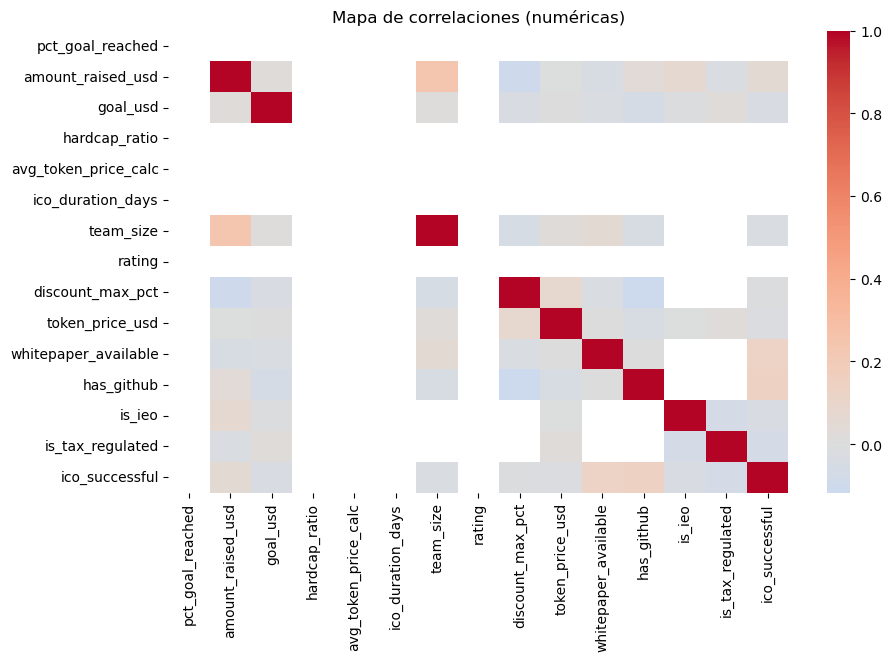

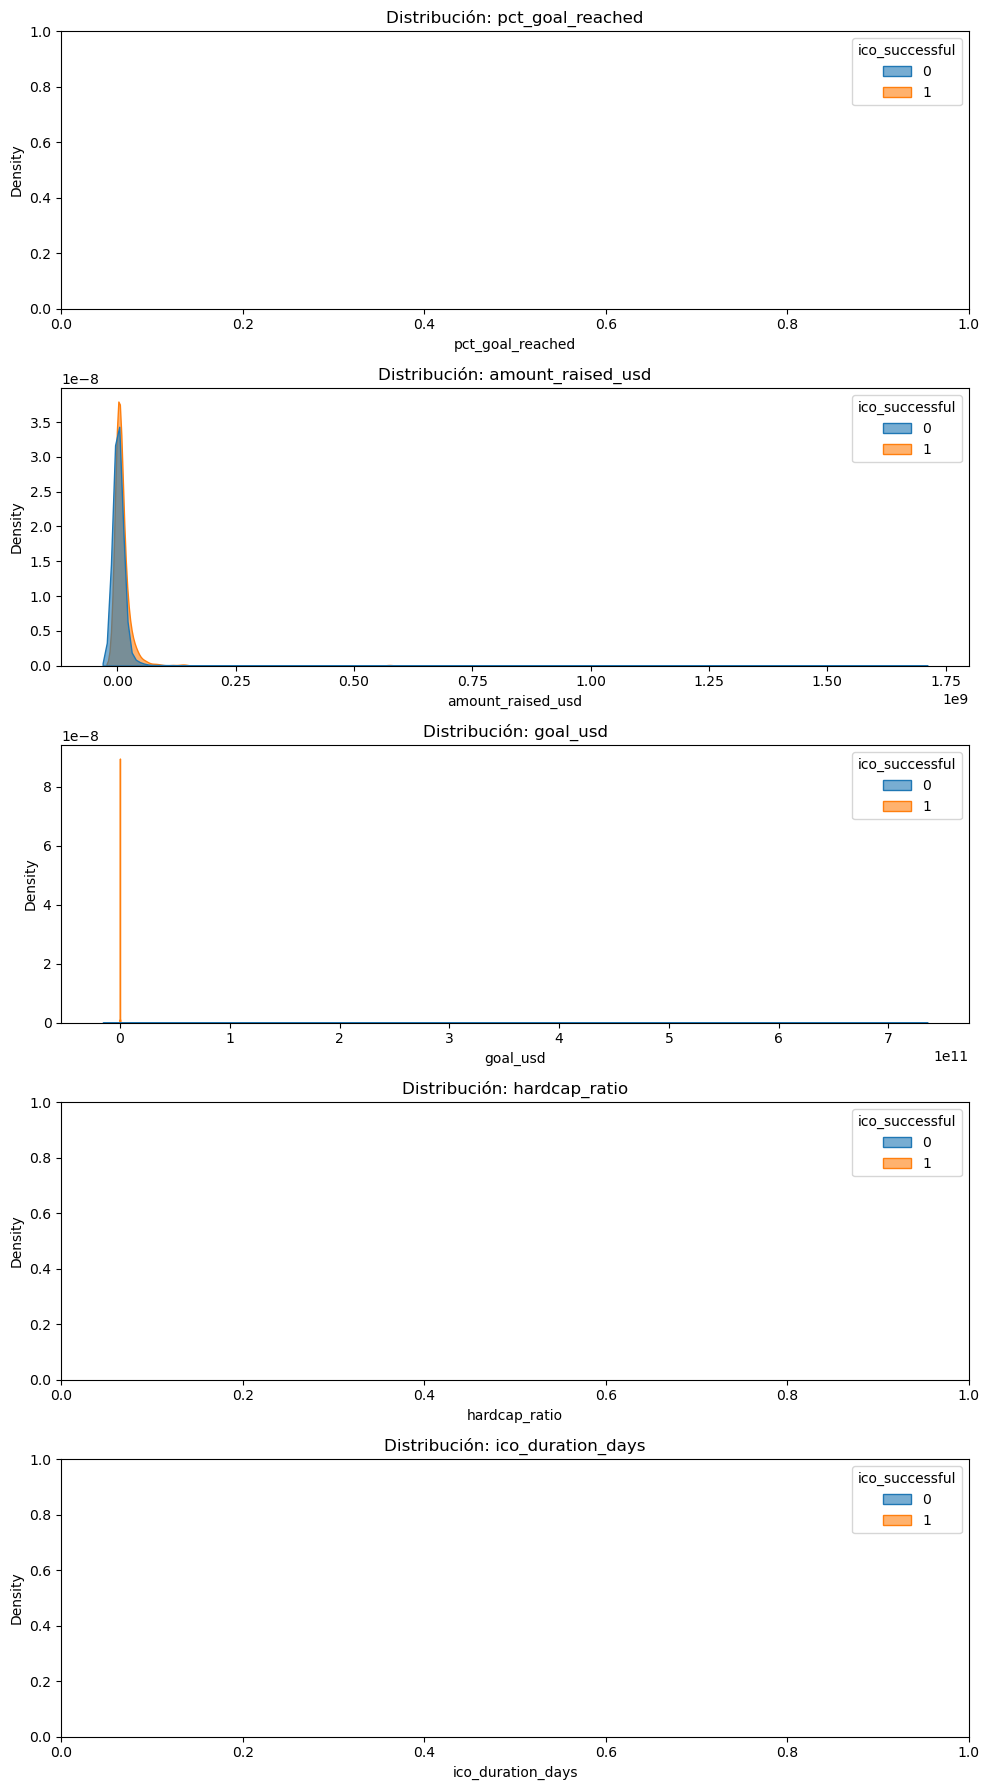

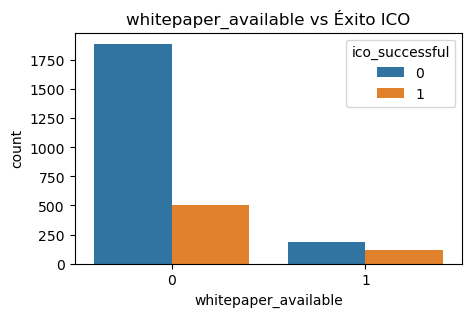

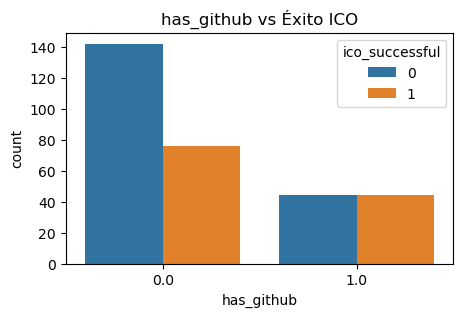

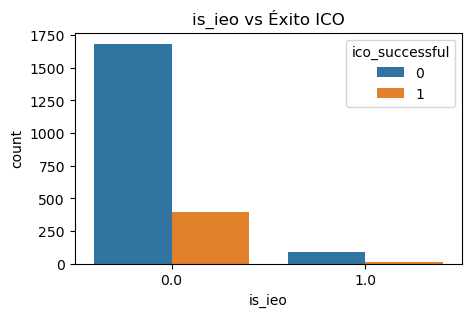

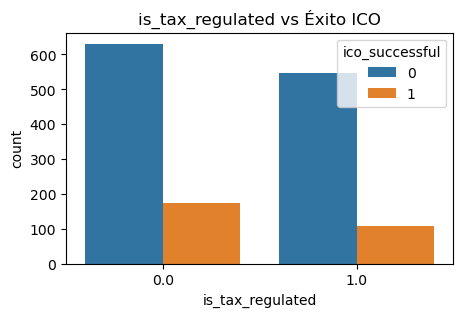

✅ Análisis visual completado.
CPU times: total: 1.27 s
Wall time: 1.59 s


In [5]:
%%time
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- CARGA ---
df = pd.read_csv("../datasets/final/ico_union_canonical_v3.csv")

# --- FEATURES CLAVE (mismo set que usó el modelo extendido) ---
key_features = [
    "pct_goal_reached","amount_raised_usd","goal_usd","hardcap_ratio",
    "avg_token_price_calc","ico_duration_days","team_size","rating",
    "discount_max_pct","token_price_usd","whitepaper_available","has_github",
    "is_ieo","is_tax_regulated"
]

df = df.copy()
for f in key_features:
    if f not in df.columns:
        df[f] = np.nan

df = df[df["ico_successful"].notna()].copy()
df["ico_successful"] = df["ico_successful"].astype(int)

# --- FUNCIONES AUXILIARES ---
def describe_grouped(df, group_col="ico_successful", numeric_cols=None):
    """
    Muestra promedio, mediana y desviación para cada variable numérica, por clase.
    """
    if numeric_cols is None:
        numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    stats = []
    for col in numeric_cols:
        if col == group_col: continue
        sub = df[[group_col, col]].dropna()
        if sub.empty: continue
        mean0, mean1 = sub.groupby(group_col)[col].mean()
        med0, med1 = sub.groupby(group_col)[col].median()
        stats.append({
            "feature": col,
            "mean_no_success": mean0,
            "mean_success": mean1,
            "median_no_success": med0,
            "median_success": med1,
            "mean_diff": mean1 - mean0
        })
    return pd.DataFrame(stats).sort_values("mean_diff", ascending=False)

# --- DESCRIPTIVO NUMÉRICO ---
num_cols = df[key_features].select_dtypes(include=[np.number]).columns.tolist()
summary = describe_grouped(df, "ico_successful", num_cols)
display(summary.head(15))

# --- CORRELACIONES ---
plt.figure(figsize=(10,6))
corr = df[num_cols + ["ico_successful"]].corr()
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Mapa de correlaciones (numéricas)")
plt.show()

# --- DISTRIBUCIONES CLAVE ---
top_plot = ["pct_goal_reached", "amount_raised_usd", "goal_usd", "hardcap_ratio", "ico_duration_days"]

fig, axs = plt.subplots(len(top_plot), 1, figsize=(10, 18))
for i, feat in enumerate(top_plot):
    if feat in df.columns:
        sns.kdeplot(data=df, x=feat, hue="ico_successful", fill=True, common_norm=False, ax=axs[i], alpha=0.6)
        axs[i].set_title(f"Distribución: {feat}")
plt.tight_layout()
plt.show()

# --- CATEGÓRICAS MÁS INTERESANTES ---
cat_cols = ["whitepaper_available","has_github","is_ieo","is_tax_regulated"]
for c in cat_cols:
    if c not in df.columns: continue
    plt.figure(figsize=(5,3))
    sns.countplot(data=df, x=c, hue="ico_successful")
    plt.title(f"{c} vs Éxito ICO")
    plt.show()

print("✅ Análisis visual completado.")


In [16]:
%%time
# --- RANDOM FOREST (EX-ANTE) ---
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, average_precision_score
)

#DF_PATH = "../datasets/foundico/foundico_enriched_from_joined.csv"
#DF_PATH = "../datasets/join/ico_exante_features_v3.csv"
DF_PATH = "../datasets/final/ico_dataset_preico_normalized.csv"
TARGET  = "ico_successful"
ID_COLS = ["name_std","symbol_std", TARGET]

df = pd.read_csv(DF_PATH)
df = df[df['ico_successful'].notna()]
display(df.head(15))
# Si uso el dataset de FoundICO sin juntarlo con el Joined, le borro columnas post-ICO
#df.drop(columns=['amount_raised', 'hit_soft_cap', 'hit_hard_cap', 'ico_successful_rule', 'markets', 
#                 'ico_score', 'foundico_id', 'token_price_unit', 'purchase_unit'], inplace=True)   

df = df.copy()
y = df[TARGET].astype("Int64").astype(float).astype(int)
X = df.drop(columns=[c for c in ID_COLS if c in df.columns] + drop_date_cols, errors="ignore")

num_cols = X.select_dtypes(include=["number"]).columns.tolist()
cat_cols = X.select_dtypes(exclude=["number"]).columns.tolist()

num_pipe = Pipeline(steps=[("imp", SimpleImputer(strategy="median"))])
cat_pipe = Pipeline(steps=[
    ("imp", SimpleImputer(strategy="most_frequent")),
    ("oh",  OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])
prep = ColumnTransformer(
    transformers=[("num", num_pipe, num_cols),
                  ("cat", cat_pipe, cat_cols)],
    remainder="drop"
)

rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    min_samples_leaf=2,
    class_weight="balanced_subsample",
    random_state=42,
    n_jobs=-1
)

pipe = Pipeline(steps=[("prep", prep), ("clf", rf)])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

pipe.fit(X_train, y_train)
y_pred  = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)[:, 1]

print("=== RandomForest (balanced_subsample) ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}  |  ROC-AUC: {roc_auc_score(y_test, y_proba):.3f}  |  PR-AUC: {average_precision_score(y_test, y_proba):.3f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=3))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Importancias con nombres consistentes
feat_names = pipe.named_steps["prep"].get_feature_names_out()
importances = pipe.named_steps["clf"].feature_importances_
imp_df = pd.DataFrame({"feature": feat_names, "importance": importances}).sort_values("importance", ascending=False)

print("\nTop 20 importancias RF:")
print(imp_df.head(20).to_string(index=False))

print(f"\nCategorical columnas usadas: {cat_cols}.")
print(f"\nNumerical columnas usadas: {num_cols}.\n")
print(f'Distribucion de ico_successful: {df["ico_successful"].value_counts(dropna=False)}')


,category,platform,location,kyc,whitelist,mvp,has_website,has_whitepaper,has_github,has_twitter,has_facebook,has_reddit,roadmap_available,is_tax_regulated,ico_successful,start_year,start_qtr,soft_cap,hard_cap,token_price,tokens_for_sale,min_purchase,max_purchase,team_size,cap_ratio_soft_over_hard,ticket_minmax_ratio,price_to_softcap_ratio,sale_vs_capacity_ratio,accepts_eth,accepts_btc,accepts_usdt,accepts_usdc,accepts_bnb,accepts_busd,accepts_sol,accepts_matic,accepts_ltc,accepts_xrp,accepts_bch,accepts_fiat
0,Finance,Solana,South Africa,0.0,0.0,0.0,1.0,1,0.0,1.0,1.0,0.0,NaN,NaN,1,2025.0,1.0,NaN,13.815512,0.029559,18.826146,3.044522,6.908755,NaN,NaN,0.02000,NaN,4.500000,1,1,1,1,0,0,1,0,0,0,0,0
1,Energy,Other,United Kingdom,0.0,0.0,0.0,1.0,1,0.0,1.0,0.0,1.0,NaN,NaN,1,2022.0,4.0,15.702580,15.702580,0.012916,20.723266,NaN,NaN,NaN,1.000000,NaN,1.969697e-09,1.969697,1,0,1,0,0,0,0,0,0,0,0,0
2,Logistics,Ethereum,Romania,1.0,1.0,0.0,1.0,1,0.0,1.0,1.0,0.0,NaN,NaN,1,2023.0,1.0,19.113828,20.322788,0.003992,20.723266,NaN,NaN,NaN,0.298507,NaN,2.000000e-11,0.005970,1,0,1,0,0,0,0,0,0,0,0,0
3,Entertainment,Binance Chain,Seychelles,0.0,0.0,1.0,1.0,1,1.0,1.0,0.0,0.0,NaN,NaN,1,2023.0,2.0,13.527830,15.627889,0.009950,22.109560,NaN,10.819818,NaN,0.122449,NaN,1.333333e-08,6.530612,1,0,1,1,1,0,0,1,0,0,0,0
4,Cryptocurrency,NaN,Cayman Islands,1.0,1.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,0,2018.0,2.0,12.420169,17.089147,0.308954,19.093625,0.000000,0.000000,NaN,0.009382,NaN,1.461165e-06,2.686843,1,0,0,0,0,0,0,0,0,0,0,0
5,Big data,NaN,NaN,1.0,1.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2018.0,3.0,17.504390,17.504390,0.095310,19.113828,0.000000,0.000000,NaN,1.000000,NaN,2.500000e-09,0.500000,1,1,0,0,0,0,0,0,1,0,0,1
6,Investment,NaN,Netherlands,0.0,1.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,0,2018.0,2.0,14.317785,14.317785,2.064036,12.611541,0.000000,0.000000,NaN,1.000000,NaN,4.162060e-06,1.248618,1,0,0,0,0,0,0,0,0,0,0,0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0
8,Artificial Intelligence,Binance Chain,Switzerland,0.0,0.0,0.0,1.0,1,0.0,1.0,0.0,0.0,NaN,NaN,1,2024.0,1.0,6.908755,13.122365,0.000700,19.231611,6.216606,10.819798,NaN,0.002000,0.01000,7.000000e-07,0.315000,0,0,1,0,1,0,0,0,0,0,0,0
9,Cryptocurrency,NaN,Cayman Islands,1.0,1.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,0,2018.0,2.0,15.388119,NaN,0.693147,27.813343,0.693147,0.693147,NaN,NaN,1.00000,2.075033e-07,NaN,1,1,0,0,0,0,0,0,0,0,0,0


=== RandomForest (balanced_subsample) ===
Accuracy: 0.763  |  ROC-AUC: 0.817  |  PR-AUC: 0.719

Classification Report:
              precision    recall  f1-score   support

           0      0.802     0.845     0.823       625
           1      0.676     0.608     0.640       332

    accuracy                          0.763       957
   macro avg      0.739     0.727     0.732       957
weighted avg      0.758     0.763     0.760       957

Confusion Matrix:
[[528  97]
 [130 202]]

Top 20 importancias RF:
                      feature  importance
num__cap_ratio_soft_over_hard    0.120833
                num__soft_cap    0.110042
                num__hard_cap    0.057739
             num__token_price    0.050243
  num__sale_vs_capacity_ratio    0.050146
         num__tokens_for_sale    0.048116
            num__min_purchase    0.046090
            num__max_purchase    0.045711
        num__is_tax_regulated    0.036688
              num__start_year    0.031637
     num__ticket_minmax_ra

In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv("../datasets/final/ico_dataset_preico_features.csv")

print(f"🧾 Filas: {df.shape[0]} | Columnas: {df.shape[1]}")

# Buscar columnas con NaN o inf
problem_cols = df.columns[df.isna().any() | np.isinf(df.select_dtypes(include=[float, int])).any()]
print(f"\n⚠️ Columnas con NaN o inf: {list(problem_cols)}")

# Mostrar filas donde aparecen los inf/NaN
rows_with_problems = df[df[problem_cols].isna().any(axis=1) | np.isinf(df[problem_cols].select_dtypes(include=[float, int])).any(axis=1)]
print(f"\n🔎 Filas con problemas: {rows_with_problems.shape[0]}")

display(rows_with_problems.head(10))


🧾 Filas: 5430 | Columnas: 25

⚠️ Columnas con NaN o inf: ['accepting', 'soft_cap', 'hard_cap', 'token_price', 'token_price_unit', 'tokens_for_sale', 'min_purchase', 'max_purchase', 'token_type', 'type', 'category', 'platform', 'location', 'kyc', 'whitelist', 'mvp', 'ico_score', 'has_website', 'has_whitepaper', 'has_github', 'has_twitter', 'has_facebook', 'has_reddit', 'ico_successful']

🔎 Filas con problemas: 4118


,accepting,soft_cap,hard_cap,token_price,token_price_unit,tokens_for_sale,min_purchase,max_purchase,purchase_unit,token_type,...,whitelist,mvp,ico_score,has_website,has_whitepaper,has_github,has_twitter,has_facebook,has_reddit,ico_successful
0,BNB,NaN,2.000000e+04,0.000,USD,5.000000e+10,NaN,NaN,$BABYGMM,NaN,...,0.0,0.0,4.0,1.0,1,0.0,1.0,0.0,0.0,NaN
1,ETH,6000000.0,2.700000e+08,1.000,USD,6.000000e+06,0.5,300000.0,$BEEPower,NaN,...,0.0,0.0,3.5,1.0,1,0.0,1.0,0.0,0.0,NaN
2,"USDT,ETH",20000000.0,5.388333e+07,0.036,ETH,1.000000e+11,NaN,NaN,$BEKY,ERC20,...,0.0,0.0,4.4,1.0,1,0.0,0.0,0.0,0.0,NaN
3,"ETH,SOL,USDT",NaN,NaN,0.000,USD,3.000000e+10,NaN,NaN,$BITDOGE,NaN,...,0.0,0.0,6.4,1.0,1,0.0,1.0,0.0,0.0,NaN
4,"USDT,SOL,USDC,ETH,BTC",NaN,1.000000e+06,0.030,USD,1.500000e+08,20.0,1000.0,USD,NaN,...,0.0,0.0,5.6,1.0,1,0.0,1.0,1.0,0.0,1.0
5,"USDT,USDC,ETH,BTC",2500000.0,1.000000e+07,0.040,USD,1.000000e+08,NaN,NaN,$BOLD,NaN,...,0.0,0.0,4.2,1.0,1,0.0,1.0,0.0,0.0,NaN
6,"BNB,ETH,USDT,CARD",3960000.0,6.125000e+06,0.990,USD,6.125000e+06,NaN,NaN,$BTCBSC,NaN,...,0.0,0.0,3.9,1.0,1,0.0,1.0,0.0,0.0,NaN
7,"USDT,BUSD,USDC,BTC,BNB,ETH",150000.0,6.000000e+06,0.310,USD,2.100000e+07,500000.0,20000000.0,$BTCC,NaN,...,0.0,1.0,4.8,1.0,1,1.0,1.0,0.0,0.0,NaN
8,"ETH,BNB,USDT",NaN,1.568000e+09,0.011,USD,2.800000e+09,NaN,NaN,$BTCMTX,ERC20,...,0.0,0.0,6.5,1.0,1,0.0,1.0,0.0,0.0,NaN
9,ETH USDT,6600000.0,6.600000e+06,0.013,USD,1.000000e+09,NaN,NaN,$CCHG,NaN,...,0.0,0.0,7.5,1.0,1,0.0,1.0,0.0,1.0,1.0


In [12]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
display(df.head(20))

,soft_cap,hard_cap,token_price,tokens_for_sale,min_purchase,max_purchase,category,platform,location,kyc,whitelist,mvp,has_website,has_whitepaper,has_github,has_twitter,has_facebook,has_reddit,team_size,roadmap_available,is_tax_regulated,ico_successful
0,NaN,1.000000e+06,0.030000,1.500000e+08,20.0,1000.0,Finance,Solana,South Africa,0.0,0.0,0.0,1.0,1,0.0,1.0,1.0,0.0,NaN,NaN,NaN,1
1,6.600000e+06,6.600000e+06,0.013000,1.000000e+09,NaN,NaN,Energy,Other,United Kingdom,0.0,0.0,0.0,1.0,1,0.0,1.0,0.0,1.0,NaN,NaN,NaN,1
2,2.000000e+08,6.700000e+08,0.004000,1.000000e+09,NaN,NaN,Logistics,Ethereum,Romania,1.0,1.0,0.0,1.0,1,0.0,1.0,1.0,0.0,NaN,NaN,NaN,1
3,7.500000e+05,6.125000e+06,0.010000,4.000000e+09,NaN,50001.0,Entertainment,Binance Chain,Seychelles,0.0,0.0,1.0,1.0,1,1.0,1.0,0.0,0.0,NaN,NaN,NaN,1
4,2.477475e+05,2.640720e+07,0.362000,1.960000e+08,0.0,0.0,Cryptocurrency,NaN,Cayman Islands,1.0,1.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
5,4.000000e+07,4.000000e+07,0.100000,2.000000e+08,0.0,0.0,Big data,NaN,NaN,1.0,1.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,1.652475e+06,1.652475e+06,6.877700,3.000000e+05,0.0,0.0,Investment,NaN,Netherlands,0.0,1.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8,1.000000e+03,5.000000e+05,0.000700,2.250000e+08,500.0,50000.0,Artificial Intelligence,Binance Chain,Switzerland,0.0,0.0,0.0,1.0,1,0.0,1.0,0.0,0.0,NaN,NaN,NaN,1
9,4.819200e+06,NaN,1.000000,1.200000e+12,1.0,1.0,Cryptocurrency,NaN,Cayman Islands,1.0,1.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0


In [1]:
import joblib

bundle = joblib.load("../datasets/artifacts/ico_preproc_bundle.pk1")

X_train_prep = bundle.X_train_prep   # numpy array listo para modelar
X_test_prep  = bundle.X_test_prep
y_train      = bundle.y_train
y_test       = bundle.y_test

feat_names   = bundle.feature_names   # nombres alineados a X_*_prep
preproc      = bundle.preprocessor    # ColumnTransformer ya fit
cat_cols     = bundle.categorical_cols
num_cols     = bundle.numeric_cols
bin_cols     = bundle.binary_cols

# Reconstituir preprocesador con las mismas listas
def build_preprocessor(cats, nums, bins):
    cat_pipe = Pipeline([
        ("imp", SimpleImputer(strategy="most_frequent")),
        ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),  # usa sparse=False si tu sklearn es <1.2
    ])
    num_pipe = Pipeline([
        ("imp", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
    ])
    bin_pipe = Pipeline([
        ("imp", SimpleImputer(strategy="constant", fill_value=0)),
    ])
    transformers = []
    if nums: transformers.append(("num", num_pipe, nums))
    if bins: transformers.append(("bin", bin_pipe, bins))
    if cats: transformers.append(("cat", cat_pipe, cats))
    return ColumnTransformer(transformers, remainder="drop")


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, average_precision_score

rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_leaf=2,
    class_weight="balanced_subsample",
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_prep, y_train)

y_pred  = rf.predict(X_test_prep)
y_proba = rf.predict_proba(X_test_prep)[:, 1]

print("=== RandomForest (balanced_subsample) ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}  |  ROC-AUC: {roc_auc_score(y_test, y_proba):.3f}  |  PR-AUC: {average_precision_score(y_test, y_proba):.3f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=3))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


=== RandomForest (balanced_subsample) ===
Accuracy: 0.767  |  ROC-AUC: 0.814  |  PR-AUC: 0.710

Classification Report:
              precision    recall  f1-score   support

           0      0.812     0.838     0.824       751
           1      0.674     0.633     0.653       398

    accuracy                          0.767      1149
   macro avg      0.743     0.735     0.739      1149
weighted avg      0.764     0.767     0.765      1149

Confusion Matrix:
[[629 122]
 [146 252]]


Fitting 5 folds for each of 36 candidates, totalling 180 fits


C:\Users\dmigl\anaconda3\Lib\site-packages\sklearn\impute\_base.py:590: FutureWarning: Currently, when `keep_empty_feature=False` and `strategy="constant"`, empty features are not dropped. This behaviour will change in version 1.8. Set `keep_empty_feature=True` to preserve this behaviour.
  warnings.warn(


=== RandomForest (balanced_subsample) ===
Accuracy: 0.762  |  ROC-AUC: 0.827  |  PR-AUC: 0.722

Classification Report:
              precision    recall  f1-score   support

           0      0.785     0.875     0.827       751
           1      0.699     0.548     0.614       398

    accuracy                          0.762      1149
   macro avg      0.742     0.711     0.721      1149
weighted avg      0.755     0.762     0.754      1149

Confusion Matrix:
[[657  94]
 [180 218]]

Best params LR: {'clf__max_depth': None, 'clf__max_features': 0.5, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 600}


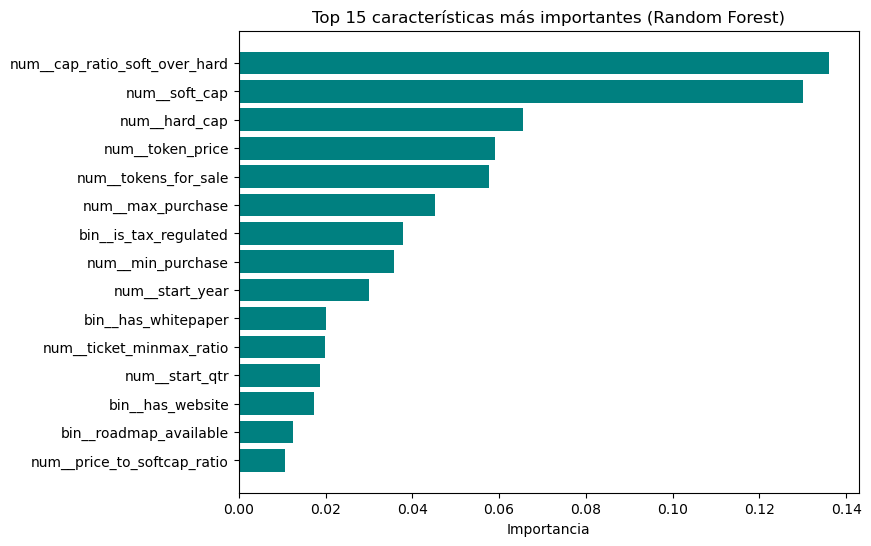

CPU times: total: 12.2 s
Wall time: 53.6 s


In [8]:
%%time

import matplotlib.pyplot as plt
import numpy as np, pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, average_precision_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

pre = build_preprocessor(bundle.categorical_cols, bundle.numeric_cols, bundle.binary_cols)

rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_leaf=2,
    class_weight="balanced_subsample",
    random_state=42,
    n_jobs=-1
)

pipe_rf = Pipeline([
    ("pre", pre),
    ("clf", rf)
])

param_grid_rf = {
    "clf__n_estimators": [300, 600],
    "clf__max_depth": [None, 10, 20],
    "clf__min_samples_leaf": [1, 3, 5],
    "clf__max_features": ["sqrt", 0.5],
}

gs_rf = GridSearchCV(
    pipe_rf, param_grid_rf, scoring="roc_auc", cv=5, n_jobs=-1, verbose=1
)
gs_rf.fit(bundle.X_train, bundle.y_train)

y_pred = gs_rf.predict(bundle.X_test)
y_proba = gs_rf.predict_proba(bundle.X_test)[:,1]

print("=== RandomForest (balanced_subsample) ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}  |  ROC-AUC: {roc_auc_score(y_test, y_proba):.3f}  |  PR-AUC: {average_precision_score(y_test, y_proba):.3f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=3))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nBest params LR:", gs_rf.best_params_)

# --- Importancia de características ---
importances = gs_rf.best_estimator_.named_steps["clf"].feature_importances_
feat_names = gs_rf.best_estimator_.named_steps["pre"].get_feature_names_out()
indices = np.argsort(importances)[-15:]
plt.figure(figsize=(8,6))
plt.barh(np.array(bundle.feature_names)[indices], importances[indices], color='teal')
plt.title("Top 15 características más importantes (Random Forest)")
plt.xlabel("Importancia")
plt.show()

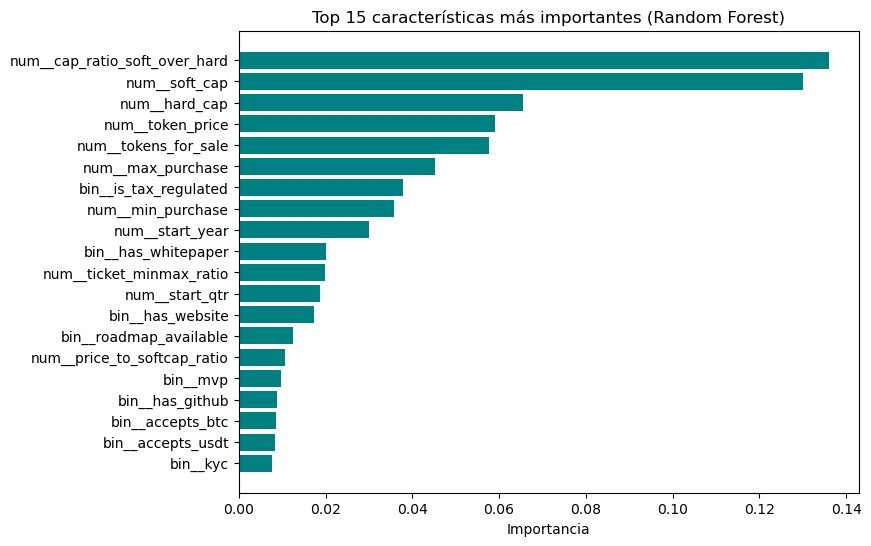

In [11]:
importances = gs_rf.best_estimator_.named_steps["clf"].feature_importances_
feat_names = gs_rf.best_estimator_.named_steps["pre"].get_feature_names_out()
indices = np.argsort(importances)[-20:]
plt.figure(figsize=(8,6))
plt.barh(np.array(bundle.feature_names)[indices], importances[indices], color='teal')
plt.title("Top 15 características más importantes (Random Forest)")
plt.xlabel("Importancia")
plt.show()